In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots

readdir()

  Activating project at `~/code/FermiCG`
┌ Info: Precompiling FermiCG [855c3b3a-d9bb-4919-8b00-0b3cfbdffb6f]
└ @ Base loading.jl:1423


17-element Vector{String}:
 ".ipynb_checkpoints"
 "Cact.molden"
 "M10.jld2"
 "cluster_N24.ipynb"
 "cluster_N24.jl"
 "cluster_N24.out"
 "cmf_data.jld2"
 "integrals_h0.npy"
 "integrals_h1.npy"
 "integrals_h2.npy"
 "mo_coeffs_act.npy"
 "mo_coeffs_doc.npy"
 "nat_orb_active_space.out"
 "nat_orb_active_space.py"
 "orbitals.molden"
 "run_tpsci.sh"
 "slurm-567532.out"

In [2]:
# build this just so we can print out molden files to view the MOs
molecule = "
H           -3.426100        -2.240400         5.488400
H           -5.627400        -1.077000         5.214700
C           -3.653500        -1.732700         4.551600
H           -1.767100        -2.237000         3.663900
C           -4.907300        -1.068800         4.394700
H           -6.163100         0.096400         3.101400
C           -2.725800        -1.732100         3.540600
H           -0.300300         1.083200        -5.235700
C           -5.209800        -0.419000         3.224900
C           -2.996100        -1.063600         2.307300
H           -1.103000        -1.532900         1.397700
H           -0.427000        -0.802900        -0.856600
H            0.236100        -0.097900        -3.127300
C           -1.019300         1.073000        -4.415000
H           -2.498800         2.251900        -5.503400
C           -4.274000        -0.392400         2.144500
H           -5.501500         0.794400         0.831000
C           -2.061300        -1.027200         1.271800
C           -1.382000        -0.289500        -0.977200
C           -0.717100         0.418000        -3.247600
C           -2.272000         1.739500        -4.569000
H           -4.157600         2.241200        -3.678700
C           -4.546300         0.281700         0.953400
C           -2.324300        -0.340200         0.070400
C           -1.652800         0.387400        -2.167000
C           -3.199800         1.734100        -3.558400
C           -3.604400         0.330900        -0.094300
C           -2.930200         1.059100        -2.329200
C           -3.866500         1.018700        -1.295500
H           -4.824300         1.525600        -1.421700
H            6.954300         5.020900        -5.781400
H            9.130800         5.788500        -4.794600
C            7.130300         4.913900        -4.709900
H            5.199700         4.047800        -4.322900
C            8.368100         5.351000        -4.148200
H            9.543000         5.570100        -2.368400
C            6.155900         4.370100        -3.908500
H            4.469100         3.270900        -2.103400
C            8.601900         5.233600        -2.800800
C            6.366300         4.207300        -2.503300
C            5.408400         3.620800        -1.673100
C            7.624000         4.655100        -1.933900
H            8.793800         4.849500        -0.136000
H            3.726000         2.535700         0.128600
C            5.630800         3.465600        -0.289200
C            7.849900         4.509800        -0.563800
C            4.668600         2.877900         0.557100
C            6.887300         3.923700         0.283000
H            8.046600         4.121200         2.098700
H            2.974600         1.818600         2.362500
C            4.893400         2.733400         1.927600
C            7.108600         3.769300         1.667200
C            3.915400         2.155900         2.795000
H            3.383500         1.608200         4.789600
C            6.150200         3.183400         2.497000
H            7.316000         3.346600         4.316500
C            4.148200         2.042400         4.143100
C            6.360000         3.023000         3.902600
C            5.385400         2.480900         4.704600
H            5.560600         2.377300         5.776700
H            1.028200         5.020900        -5.781400
H            3.204700         5.788500        -4.794600
C            1.204300         4.913900        -4.709900
H           -0.726400         4.047800        -4.322900
C            2.442000         5.351000        -4.148200
H            3.616900         5.570100        -2.368400
C            0.229800         4.370100        -3.908500
H           -1.457000         3.270900        -2.103400
C            2.675800         5.233600        -2.800800
C            0.440300         4.207300        -2.503300
C           -0.517600         3.620800        -1.673100
C            1.697900         4.655100        -1.933900
H            2.867800         4.849500        -0.136000
H           -2.200000         2.535700         0.128600
H           -2.951500         1.818600         2.362500
C           -0.295200         3.465600        -0.289200
C            1.923900         4.509800        -0.563800
H           -2.542500         1.608200         4.789600
C           -1.257500         2.877900         0.557100
C           -2.010600         2.155900         2.795000
C            0.961300         3.923700         0.283000
H            2.120600         4.121200         2.098700
C           -1.777900         2.042400         4.143100
H           -0.365500         2.377300         5.776700
C           -1.032700         2.733400         1.927600
C            1.182500         3.769300         1.667200
C           -0.540600         2.480900         4.704600
C            0.224100         3.183400         2.497000
C            0.434000         3.023000         3.902600
H            1.389900         3.346600         4.316500
H            3.427300         2.251900        -5.503400
H            5.625800         1.083200        -5.235700
C            3.654100         1.739500        -4.569000
H            1.768500         2.241200        -3.678700
H            0.298700        -1.077000         5.214700
C            4.906700         1.073000        -4.415000
H            6.162100        -0.097900        -3.127300
C            2.726300         1.734100        -3.558400
H           -0.237000         0.096400         3.101400
C            1.018700        -1.068800         4.394700
H            2.500000        -2.240400         5.488400
H            0.424600         0.794400         0.831000
H            1.101800         1.525600        -1.421700
C            5.209000         0.418000        -3.247600
C            2.995900         1.059100        -2.329200
C            0.716200        -0.419000         3.224900
C            2.272600        -1.732700         4.551600
H            4.159000        -2.237000         3.663900
C            1.379700         0.281700         0.953400
C            2.059600         1.018700        -1.295500
C            4.273300         0.387400        -2.167000
H            5.499100        -0.802900        -0.856600
C            1.652100        -0.392400         2.144500
C            3.200300        -1.732100         3.540600
C            2.321700         0.330900        -0.094300
C            4.544100        -0.289500        -0.977200
C            2.930000        -1.063600         2.307300
C            3.601700        -0.340200         0.070400
C            3.864800        -1.027200         1.271800
H            4.823000        -1.532900         1.397700
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "6-31g*"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);

In [3]:
#load integrals from disk
ints = InCoreInts(
    npzread("integrals_h0.npy"), 
    npzread("integrals_h1.npy"), 
    npzread("integrals_h2.npy") 
);
C = npzread("mo_coeffs_act.npy")
S = npzread("../overlap_mat.npy");
D = npzread("../density_mat.npy");

 Laplacian Eigenvalues
    1   0.00000000
    2   0.08991497
    3   0.13476186
    4   0.19037781
    5   0.40482723
    6   0.44783998
    7   0.45985091
    8   0.47588788
    9   0.51223950
   10   0.53825052
   11   0.55886753
   12   0.58531739
   13   0.76158233
   14   0.82528165
   15   0.85150016
   16   0.86701331
   17   1.04840661
   18   1.06928614
   19   1.09209729
   20   1.11337595
   21   1.15847279
   22   1.16883738
   23   1.19859802
   24   1.21616464
[1, 5, 9, 12, 13, 24, 2, 6, 11, 14, 18, 22, 4, 7, 10, 15, 19, 21, 3, 8, 16, 17, 20, 23]

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/nicole/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


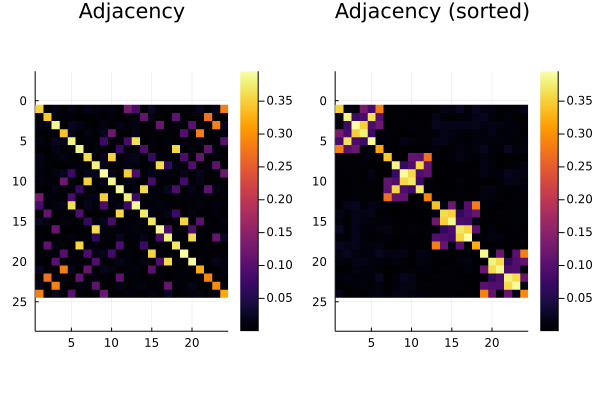

In [4]:
using LinearAlgebra, Printf
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

function cluster_orbitals(A, n_clusters)
    """
    A is adjacency matrix
    """
    
    L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
    F = eigen(L);
    perm = sortperm(F.values, by=abs)
    F.values .= F.values[perm]
    F.vectors .= F.vectors[:,perm]

    print(" Laplacian Eigenvalues\n")
    for (fi_idx, fi) in enumerate(F.values)
        @printf(" %4i %12.8f\n", fi_idx, fi)
    end
    
    p1 = plot(F.values)
    
    A = abs.(F.vectors[:,1:n_clusters]*F.vectors[:,1:n_clusters]')
    p2 = heatmap(abs.(A), aspect_ratio=:equal, title="Projector", yflip = true)
    
    clustering = clusterize(KMeansClusterizer(n_clusters), A).assignments;

    perm = sortperm(clustering)
    p3 = heatmap(abs.(A[perm,perm]), aspect_ratio=:equal, title="Projector", yflip = true)

    clusters = [ [] for i in 1:n_clusters]
    for (idx,i) in enumerate(clustering)
        push!(clusters[i],idx)
    end

    plot(p1, p2, p3, layout = @layout [a; b c])

    return perm, clusters
end

n_clusters = 4
adjacency = abs.(C'*D*C)
perm, cluster_list = cluster_orbitals(adjacency, n_clusters)
print(perm)
    
p1 = heatmap(adjacency, aspect_ratio=:equal, title="Adjacency", yflip = true) 
p2 = heatmap(adjacency[perm, perm], aspect_ratio=:equal, title="Adjacency (sorted)", yflip = true) 

ints_sorted = deepcopy(ints)
ints_sorted.h1 .= ints.h1[perm,perm]
ints_sorted.h2 .= ints.h2[perm,perm,perm,perm];
C_sorted = C[:,perm]
FermiCG.pyscf_write_molden(mol,C_sorted,filename="orbitals.molden");

plot(p1, p2, layout = @layout [a b])

In [5]:
# define clusters
cluster_list = [collect(1:6), collect(7:12), collect(13:18), collect(19:24)]
clusters = [Cluster(i,collect(cluster_list[i])) for i = 1:length(cluster_list)]
init_fspace = [ (3,3) for i in 1:n_clusters]
display(clusters)


4-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6])
 Cluster(2, [7, 8, 9, 10, 11, 12])
 Cluster(3, [13, 14, 15, 16, 17, 18])
 Cluster(4, [19, 20, 21, 22, 23, 24])

In [6]:
rdm1 =  C_sorted' * S * D * S * C_sorted * .5

e_cmf, U_cmf, Da, Db  = FermiCG.cmf_oo(ints_sorted, clusters, init_fspace, rdm1, rdm1,
                                        max_iter_oo=150, verbose=0, gconv=1e-6, method="bfgs");

C_cmf = C_sorted * U_cmf
ints_cmf = FermiCG.orbital_rotation(ints_sorted, U_cmf);

 ooCMF Iter:    1 Total= -2754.608997499815 Active= -34.842547065683 G=     6.63e-02
 ooCMF Iter:    2 Total= -2754.610983980348 Active= -34.844533546217 G=     1.30e-02
 ooCMF Iter:    3 Total= -2754.611071143947 Active= -34.844620709815 G=     3.64e-03
 ooCMF Iter:    4 Total= -2754.611079975465 Active= -34.844629541333 G=     2.13e-03
 ooCMF Iter:    5 Total= -2754.611087520279 Active= -34.844637086147 G=     2.64e-03
 ooCMF Iter:    6 Total= -2754.611092609189 Active= -34.844642175057 G=     9.41e-04
 ooCMF Iter:    7 Total= -2754.611093024173 Active= -34.844642590042 G=     3.01e-04
 ooCMF Iter:    8 Total= -2754.611093076175 Active= -34.844642642043 G=     1.56e-04
 ooCMF Iter:    9 Total= -2754.611093109736 Active= -34.844642675604 G=     1.97e-04
 ooCMF Iter:   10 Total= -2754.611093154662 Active= -34.844642720530 G=     1.15e-04
 ooCMF Iter:   11 Total= -2754.611093160961 Active= -34.844642726829 G=     3.22e-05
 ooCMF Iter:   12 Total= -2754.611093161720 Active= -34.844642727

 * Status: success

 * Candidate solution
    Final objective value:     -2.754611e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.13e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.17e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.59e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.03e-14 ≰ 0.0e+00
    |g(x)|                 = 5.71e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   40  (vs limit Inf)
    Iterations:    14
    f(x) calls:    39
    ∇f(x) calls:   39


*ooCMF -2754.61109316 


In [7]:
ints = ints_cmf
C = C_cmf;

In [8]:
max_roots = 40

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);


 Remove duplicates
 Number of terms reduced from  1036 to   472


In [9]:
using JLD2
@save "cmf_data.jld2" ints Da Db e_cmf C U_cmf cluster_bases clusters init_fspace

In [10]:
nroots = 31
ci_vector = FermiCG.TPSCIstate(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
# Add the lowest energy single exciton to basis
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([3,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,3,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,3,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,3])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([4,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,4,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,4,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,4])] = zeros(Float64,nroots)

# TT states ms=0
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,2,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,2,2])] = zeros(Float64,nroots)

# Spin-flip states
fspace_0 = FermiCG.FockConfig(init_fspace)

## ba
tmp_fspace = FermiCG.replace(fspace_0, (1,2), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,3), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,4), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,3), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,4), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (3,4), ([2,4],[4,2]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)

## ab
tmp_fspace = FermiCG.replace(fspace_0, (1,2), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,3), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,4), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,3), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,4), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (3,4), ([4,2],[2,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)

FermiCG.eye!(ci_vector)


In [12]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =1e-2,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-5,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-4, # Threshold for adding to P-space
                            max_iter=10);
@time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, clustered_ham, thresh_foi=1e-8);

@save "M10.jld2" clusters Da Db ints C cluster_bases ci_vector e0 v0 e2

 ci_vector     : (31, 31)
 thresh_cipsi  : 0.0001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : nothing
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : true
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 threaded      : true


     Selected CI Iteration:    1 epsilon:   0.00010000
 Memory needed to hold full CI matrix:   0.00000769 (Gb) Max allowed:  20.00000000 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    31: 
 Build full Hamiltonian matrix with dimension:       0.323443 seconds (1.12 M allocations: 58.148 MiB, 99.67% compilation time)
 Now diagonalize
 Diagonalization time:                               0.000397 seconds
(31, 31)(31, 31)
 Compute S2 expectation values:                      0.326912 seconds (470.92 k allocations: 25.851 MiB, 99.62% compilation time)
  Root       Energy           S2
     1 -34.84

 Singular values of overlap:
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
 Norm of new projection:
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000

 In open_matvec_thread
 Setup threaded jobs:                                0.000589 seconds (7.68 k allocations: 630.375 KiB)
 Number of jobs:    1759
 Number of threads: 6
 Compute matrix-vector:                              6.107878 seconds (19.57 M allocation

 Iter:   7 SS: 217  E:  -34.84476476*  -34.76678383   -34.76576116   -34.76524721   -34.76461242   -34.69906108   -34.69806163   -34.69707105   -34.69700846   -34.69650092   -34.69647096   -34.69450834   -34.69345928   -34.68880212   -34.68801133   -34.68794223   -34.68784078   -34.68780999   -34.68767542   -34.68740481   -34.68723497   -34.68681059   -34.68650968   -34.68614762   -34.68578262   -34.68571471   -34.68569884   -34.68550989   -34.68525432   -34.68523426   -34.68495701   R: 3.7e-06* 1.3e-04  9.1e-05  6.5e-05  5.0e-05  2.1e-03  6.2e-04  7.7e-04  6.5e-04  1.2e-03  6.9e-04  1.4e-03  1.3e-03  2.2e-03  1.2e-03  1.3e-03  1.7e-03  8.3e-04  1.8e-04  2.7e-03  1.7e-03  1.6e-03  1.7e-04  1.6e-04  1.2e-04  7.6e-04  9.7e-04  1.5e-04  9.3e-04  1.2e-03  9.7e-05   LinDep: 1.4e-14* 
 Iter:   8 SS: 247  E:  -34.84476476*  -34.76678388   -34.76576119   -34.76524722   -34.76461243   -34.69908369   -34.69806350   -34.69707406   -34.69701080   -34.69650785   -34.69647331   -34.69451916   -34.69

 Iter:  18 SS: 101  E:  -34.84476476*  -34.76678389*  -34.76576120*  -34.76524723*  -34.76461244*  -34.69909229*  -34.69806442*  -34.69707710*  -34.69701236*  -34.69651533   -34.69647520*  -34.69452918*  -34.69347724*  -34.68883597   -34.68802547   -34.68795455   -34.68786208   -34.68781973   -34.68767555*  -34.68749586   -34.68725603   -34.68684696   -34.68650981*  -34.68614773*  -34.68578269*  -34.68572004   -34.68570947   -34.68551000*  -34.68526232   -34.68524779   -34.68495706*  R: 1.8e-06* 5.8e-07* 7.0e-07* 1.9e-06* 1.5e-06* 6.5e-06* 6.5e-06* 6.0e-06* 6.2e-06* 1.1e-05  3.1e-06* 6.3e-06* 6.8e-06* 1.2e-05  2.8e-05  1.0e-05  1.3e-05  3.3e-05  9.0e-06* 7.3e-05  1.8e-05  7.6e-05  8.8e-06* 7.6e-06* 5.8e-06* 1.2e-05  2.5e-05  8.6e-06* 1.4e-05  3.8e-05  5.6e-06*  LinDep: 2.9e-11* 
 Iter:  19 SS: 107  E:  -34.84476476*  -34.76678389*  -34.76576120*  -34.76524723*  -34.76461244*  -34.69909229*  -34.69806442*  -34.69707710*  -34.69701237*  -34.69651533*  -34.69647520*  -34.69452918*  -34.69

 Length of ASCI vector    14704 →      244 
 Overlap between old and new eigenvectors:
  1.000  0.000  0.000 -0.000  0.000  0.001 -0.000  0.000 -0.000  0.000 -0.001  0.000  0.000  0.003 -0.000 -0.000  0.001 -0.000 -0.000  0.000  0.001  0.000 -0.000  0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000
  0.000  0.882 -0.226  0.349 -0.191  0.000  0.000 -0.001 -0.002  0.012  0.000 -0.000  0.000 -0.000  0.022  0.000 -0.000 -0.008 -0.000  0.020  0.000 -0.002 -0.000 -0.000  0.000 -0.004  0.007  0.000 -0.002  0.008  0.000
  0.000 -0.226  0.911  0.398 -0.006  0.000 -0.006 -0.002 -0.009  0.000  0.000  0.000  0.000 -0.000 -0.002  0.000  0.000  0.011  0.000 -0.001  0.000 -0.011 -0.000  0.000 -0.000  0.001 -0.001 -0.000  0.000 -0.000 -0.000
 -0.000  0.349  0.398 -0.830  0.103 -0.000 -0.001  0.000 -0.008 -0.001 -0.000  0.000 -0.000 -0.000  0.016  0.000  0.000  0.000 -0.000 -0.006  0.000 -0.016 -0.000  0.000 -0.000  0.000 -0.001  0.000 -0.000  0.001  0.000
  0.000 -0.191 -0.006  0.103  0.974 -0.00

 Length of PT1  vector    93531 →    16085 
 TPSCI Iter 2   Dim: 14704  E(var):  -34.84476476  -34.76678389  -34.76576120  -34.76524723  -34.76461244  -34.69909229  -34.69806442  -34.69707710  -34.69701237  -34.69651533  -34.69647520  -34.69452918  -34.69347724  -34.68883597  -34.68802548  -34.68795455  -34.68786208  -34.68781974  -34.68767555  -34.68749591  -34.68725603  -34.68684701  -34.68650981  -34.68614773  -34.68578269  -34.68572020  -34.68570932  -34.68551000  -34.68526235  -34.68524778  -34.68495706 


     Selected CI Iteration:    3 epsilon:   0.00010000
 Add pt vector to current space  14704 →  18040
 Memory needed to hold full CI matrix:   2.60353280 (Gb) Max allowed:  20.00000000 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension = 18040: 
 Fill old/old Hamiltonian:                           4.882408 seconds (6 allocations: 229.906 KiB)
 Build old/new Hamiltonian matrix with dimension:   15.924353 seconds (489.11 M all

 Iter:  10 SS: 253  E:  -34.84476553*  -34.76678599*  -34.76576226*  -34.76524820*  -34.76461305*  -34.69911885*  -34.69806829*  -34.69707962*  -34.69701462*  -34.69651875*  -34.69648324*  -34.69454791   -34.69349048   -34.68887581   -34.68805266   -34.68797851   -34.68788487   -34.68784202   -34.68769582*  -34.68751653   -34.68727409   -34.68685902   -34.68652323*  -34.68615504*  -34.68578814*  -34.68573353   -34.68572288   -34.68551558*  -34.68527152   -34.68525666   -34.68496030*  R: 6.4e-06* 6.6e-06* 4.3e-06* 4.1e-06* 8.7e-06* 9.3e-06* 4.8e-06* 5.5e-06* 8.0e-06* 6.7e-06* 6.4e-06* 1.3e-05  1.2e-05  2.1e-05  1.3e-05  1.5e-05  1.9e-05  1.3e-05  5.4e-06* 3.4e-05  1.7e-05  1.6e-05  8.9e-06* 7.4e-06* 7.5e-06* 1.7e-05  1.8e-05  7.5e-06* 1.6e-05  2.1e-05  1.0e-05*  LinDep: 3.5e-11* 
 Iter:  11 SS: 260  E:  -34.84476553*  -34.76678599*  -34.76576226*  -34.76524820*  -34.76461305*  -34.69911885*  -34.69806829*  -34.69707962*  -34.69701462*  -34.69651875*  -34.69648324*  -34.69454791*  -34.69

 Iter:  21 SS: 273  E:  -34.84476553*  -34.76678599*  -34.76576226*  -34.76524820*  -34.76461305*  -34.69911885*  -34.69806829*  -34.69707962*  -34.69701462*  -34.69651875*  -34.69648324*  -34.69454791*  -34.69349048*  -34.68887581*  -34.68805266*  -34.68797851*  -34.68788487*  -34.68784202*  -34.68769582*  -34.68751655*  -34.68727409*  -34.68685902*  -34.68652323*  -34.68615504*  -34.68578814*  -34.68573354   -34.68572288   -34.68551558*  -34.68527153   -34.68525666*  -34.68496030*  R: 6.3e-06* 6.4e-06* 4.2e-06* 4.0e-06* 8.5e-06* 6.7e-06* 4.5e-06* 4.2e-06* 6.9e-06* 2.1e-06* 4.0e-06* 6.9e-06* 6.5e-06* 6.5e-06* 6.9e-06* 8.1e-06* 6.9e-06* 9.0e-06* 5.3e-06* 8.3e-06* 7.7e-06* 9.3e-06* 8.8e-06* 7.4e-06* 7.4e-06* 1.1e-05  1.1e-05  7.4e-06* 1.0e-05  8.2e-06* 9.8e-06*  LinDep: 3.5e-11* 
 Iter:  22 SS: 273  E:  -34.84476553*  -34.76678599*  -34.76576226*  -34.76524820*  -34.76461305*  -34.69911885*  -34.69806829*  -34.69707962*  -34.69701462*  -34.69651875*  -34.69648324*  -34.69454791*  -34.69

 Iter:  32 SS: 273  E:  -34.84476553*  -34.76678599*  -34.76576226*  -34.76524820*  -34.76461305*  -34.69911885*  -34.69806829*  -34.69707962*  -34.69701462*  -34.69651875*  -34.69648324*  -34.69454791*  -34.69349048*  -34.68887581*  -34.68805266*  -34.68797851*  -34.68788487*  -34.68784202*  -34.68769582*  -34.68751655*  -34.68727409*  -34.68685902*  -34.68652323*  -34.68615504*  -34.68578814*  -34.68573362*  -34.68572280   -34.68551558*  -34.68527154   -34.68525665*  -34.68496030*  R: 6.3e-06* 6.4e-06* 4.2e-06* 4.0e-06* 8.5e-06* 6.7e-06* 4.5e-06* 4.2e-06* 6.9e-06* 2.1e-06* 4.0e-06* 6.9e-06* 6.5e-06* 6.5e-06* 6.9e-06* 8.1e-06* 6.9e-06* 9.1e-06* 5.3e-06* 8.3e-06* 7.7e-06* 9.3e-06* 8.8e-06* 7.4e-06* 7.5e-06* 1.0e-05* 1.0e-05  7.4e-06* 1.1e-05  8.9e-06* 9.8e-06*  LinDep: 3.5e-11* 
 Iter:  33 SS: 273  E:  -34.84476553*  -34.76678599*  -34.76576226*  -34.76524820*  -34.76461305*  -34.69911885*  -34.69806829*  -34.69707962*  -34.69701462*  -34.69651875*  -34.69648324*  -34.69454791*  -34.69

 Iter:  43 SS: 273  E:  -34.84476553*  -34.76678599*  -34.76576226*  -34.76524820*  -34.76461305*  -34.69911885*  -34.69806829*  -34.69707962*  -34.69701462*  -34.69651875*  -34.69648324*  -34.69454791*  -34.69349048*  -34.68887581*  -34.68805266*  -34.68797851*  -34.68788487*  -34.68784202*  -34.68769582*  -34.68751655*  -34.68727409*  -34.68685902*  -34.68652323*  -34.68615504*  -34.68578814*  -34.68573370*  -34.68572271*  -34.68551558*  -34.68527156   -34.68525663*  -34.68496030*  R: 6.3e-06* 6.4e-06* 4.2e-06* 4.0e-06* 8.5e-06* 6.7e-06* 4.5e-06* 4.3e-06* 7.0e-06* 2.1e-06* 4.0e-06* 6.9e-06* 6.5e-06* 6.5e-06* 6.9e-06* 8.1e-06* 7.0e-06* 9.1e-06* 5.3e-06* 8.3e-06* 7.7e-06* 9.3e-06* 8.8e-06* 7.4e-06* 7.5e-06* 9.5e-06* 9.9e-06* 7.5e-06* 1.2e-05  9.8e-06* 9.8e-06*  LinDep: 3.5e-11* 
 Iter:  44 SS: 273  E:  -34.84476553*  -34.76678599*  -34.76576226*  -34.76524820*  -34.76461305*  -34.69911885*  -34.69806829*  -34.69707962*  -34.69701462*  -34.69651875*  -34.69648324*  -34.69454791*  -34.69

  0.000 -0.000 -0.000 -0.000 -0.000  0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000 -0.000  0.000  0.000  0.002  0.003 -0.005 -0.998 -0.000  0.000 -0.000  0.003  0.000  0.001 -0.000 -0.000  0.001  0.000  0.000 -0.000
  0.000 -0.000 -0.000 -0.000 -0.000  0.000 -0.000  0.000 -0.000  0.001  0.000 -0.000  0.000  0.000  0.004  0.000 -0.000 -0.001 -0.000 -0.997 -0.000  0.001 -0.000  0.000 -0.000 -0.000  0.000 -0.000  0.000 -0.001  0.000
 -0.000 -0.000 -0.000 -0.000  0.000 -0.000 -0.000  0.000 -0.000 -0.000  0.000 -0.001  0.000  0.001  0.000  0.004  0.002 -0.000  0.000 -0.000  0.997  0.000 -0.000 -0.000 -0.000  0.002  0.000 -0.000  0.000  0.000 -0.000
  0.000  0.000 -0.000 -0.000  0.000  0.000 -0.000  0.000  0.000 -0.000 -0.000  0.000 -0.000  0.000  0.001  0.000  0.000  0.002 -0.000  0.001  0.000 -0.997 -0.000 -0.000 -0.000  0.000 -0.001  0.000  0.000 -0.001 -0.000
 -0.000 -0.000  0.000 -0.000 -0.000  0.000 -0.000  0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000 -0.000  0.000  0.000  

┌ Warning: ("initial guess det(v0'v0) = ", 0.9999999999999891)
└ @ FermiCG /Users/nicole/code/FermiCG/src/type_TPSCIstate.jl:545


  0.473287 seconds (84.11 M allocations: 1.887 GiB)
 Compute <0|H|0>:                                   88.232782 seconds (3.21 G allocations: 69.987 GiB, 13.39% gc time)
 Number of jobs:    9042
 Number of threads: 6
   |----------------------------------------------------------------------------------------------------|
   |0%                                                                                              100%|
   |----------------------------------------------------------------------------------------------------|
 Time spent computing E2         68.0 (s)
  Root         E(0)         E(2)
     1 -34.84476553 -34.84476601
     2 -34.76678599 -34.76678757
     3 -34.76576226 -34.76576378
     4 -34.76524820 -34.76524953
     5 -34.76461305 -34.76461472
     6 -34.69911885 -34.69912419
     7 -34.69806829 -34.69807063
     8 -34.69707958 -34.69708201
     9 -34.69701466 -34.69701685
    10 -34.69651875 -34.69652137
    11 -34.69648324 -34.69648680
    12 -34.69454791 -34.69

In [ ]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =1e-2,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-5,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-4, # Threshold for adding to P-space
                            max_iter=10);
@time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, clustered_ham, thresh_foi=1e-8);

@save "M40.jld2" clusters Da Db ints C cluster_bases ci_vector e0 v0 e2

 ci_vector     : (31, 31)
 thresh_cipsi  : 0.0001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : nothing
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : true
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 threaded      : true


     Selected CI Iteration:    1 epsilon:   0.00010000
 Memory needed to hold full CI matrix:   0.00000769 (Gb) Max allowed:  20.00000000 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    31: 
 Build full Hamiltonian matrix with dimension:       0.336296 seconds (1.28 M allocations: 66.922 MiB, 99.55% compilation time)
 Now diagonalize
 Diagonalization time:                               0.000443 seconds
(31, 31)(31, 31)
 Compute S2 expectation values:                      0.309414 seconds (451.27 k allocations: 24.710 MiB, 99.66% compilation time)
  Root       Energy           S2
     1 -34.84

  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000

 Singular values of overlap:
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
  0.000
 Norm of new projection:
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000

 In open_matvec_thread
 Setup threaded jobs: